In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("housing.csv")

In [3]:
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
## we cannot feed the column ocean proximity to our model whichever model it is, because of text data.
## total bedrooms have a null data also so we drop the null values by using below command

In [6]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
data.dropna(inplace=True) ## this will drop the null values from the data but also again save the new data back to the file

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [9]:
## the data has now non null values

In [10]:
## we are going to split our data into training and test data and 
##split it into X and Y data because we want to train the model on one set of data and we want to evalaute on another set, 
##we are doing this because we want to see what our model does to unseen data and will it give the optimal result

In [11]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y= data['median_house_value']

In [12]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [13]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)
## 20 percent of the data is reserved for testing and we are not going to use this data for anything

In [15]:
train_data= xtrain.join(ytrain)

In [16]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
4448,-118.21,34.07,47.0,1346.0,383.0,1452.0,371.0,1.7292,<1H OCEAN,191700.0
16448,-121.27,38.14,33.0,3557.0,894.0,2659.0,894.0,2.2883,INLAND,86900.0
8141,-118.11,33.82,36.0,1742.0,340.0,857.0,341.0,4.6875,<1H OCEAN,218200.0
2074,-119.82,36.75,41.0,1022.0,209.0,741.0,213.0,2.0781,INLAND,48800.0
17671,-121.87,37.31,6.0,3797.0,984.0,2437.0,904.0,3.6802,<1H OCEAN,152400.0
...,...,...,...,...,...,...,...,...,...,...
17730,-121.76,37.33,5.0,4153.0,719.0,2435.0,697.0,5.6306,<1H OCEAN,286200.0
18043,-121.95,37.21,20.0,2345.0,322.0,890.0,276.0,10.0187,<1H OCEAN,500001.0
14833,-117.10,32.67,15.0,1635.0,553.0,1347.0,597.0,1.2745,NEAR OCEAN,92900.0
5332,-118.47,34.04,21.0,5041.0,1491.0,2719.0,1420.0,3.5335,<1H OCEAN,268800.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

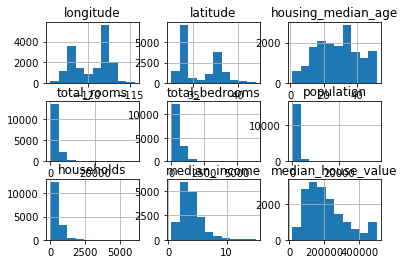

In [17]:
train_data.hist()

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

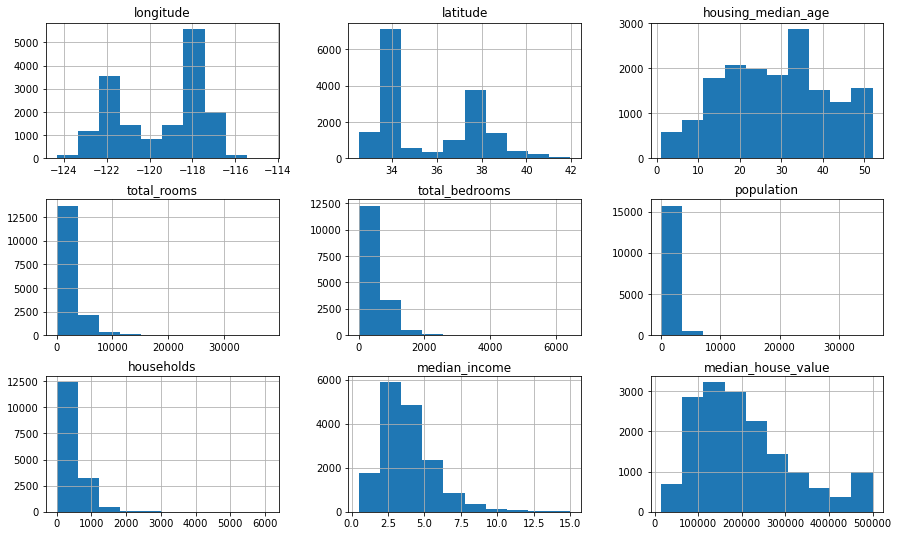

In [18]:
train_data.hist(figsize=(15,9))

<AxesSubplot:>

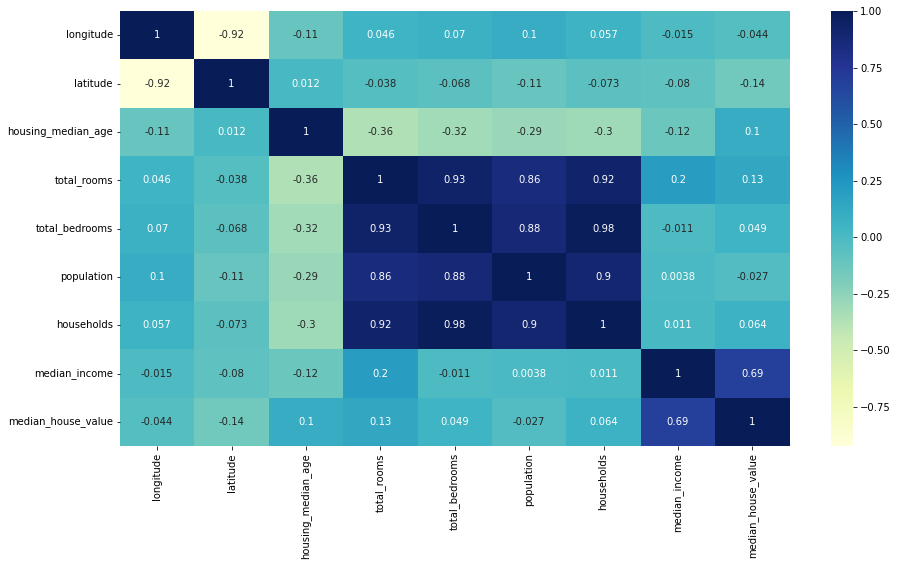

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu") 
## we are using heatmap to visualise the correlation matrix  and .corr() is a function that produces correlation heat map

In [20]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924504,-0.107630,0.045597,0.069688,0.100309,0.057132,-0.014851,-0.044285
latitude,-0.924504,1.000000,0.011969,-0.038294,-0.068284,-0.110347,-0.073437,-0.079559,-0.144884
housing_median_age,-0.107630,0.011969,1.000000,-0.360721,-0.318592,-0.292186,-0.300973,-0.122516,0.101410
total_rooms,0.045597,-0.038294,-0.360721,1.000000,0.927587,0.857122,0.918708,0.198937,0.134776
total_bedrooms,0.069688,-0.068284,-0.318592,0.927587,1.000000,0.876763,0.980625,-0.010874,0.048784
population,0.100309,-0.110347,-0.292186,0.857122,0.876763,1.000000,0.904980,0.003841,-0.027069
households,0.057132,-0.073437,-0.300973,0.918708,0.980625,0.904980,1.000000,0.010782,0.063761
median_income,-0.014851,-0.079559,-0.122516,0.198937,-0.010874,0.003841,0.010782,1.000000,0.685601
median_house_value,-0.044285,-0.144884,0.101410,0.134776,0.048784,-0.027069,0.063761,0.685601,1.000000


In [21]:
## our training data graphs are not like gaussian curves as we can see they are right skewed, 
##so what we will do is using numpy we will take logarithmc values of our training data and then plot graph and 
##see how it would look like and in order to avoid o values we will add one

In [22]:
train_data['total_rooms']=np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms']=np.log(train_data['total_rooms'] + 1)
train_data['population']=np.log(train_data['total_rooms'] + 1)
train_data['households']=np.log(train_data['total_rooms'] + 1)


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

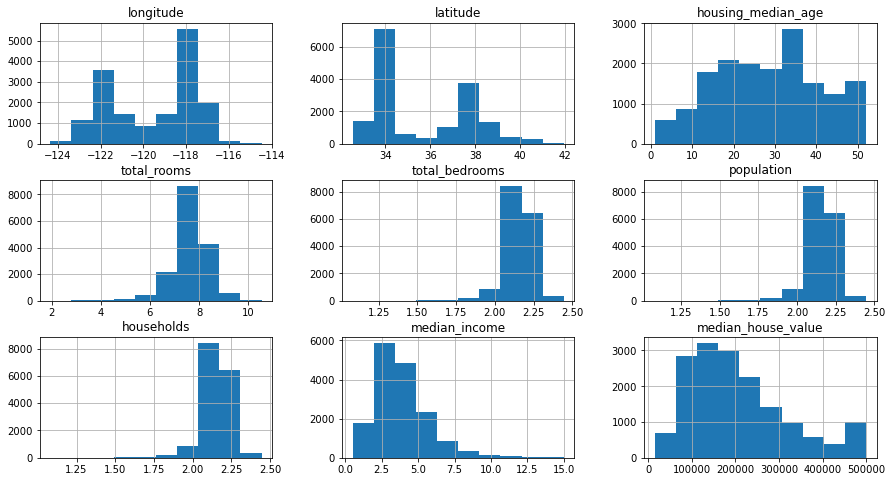

In [23]:
train_data.hist(figsize=(15,8))

In [24]:
## now we have to use ocean proximity column but it is a categorical feature so we would have to convert it into numerical data 
##so that we can use it, we cannot give them 0,1,2 values example inland value = 1 or near ocean value = 2. 
##we will have to convert them into binary format. 

In [25]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7261
INLAND        5153
NEAR OCEAN    2110
NEAR BAY      1818
ISLAND           4
Name: ocean_proximity, dtype: int64

In [26]:
## we are going to give each of the above categories a feature and it will be in he format of binary that is yes or no, 
##for example is the location/house nearby in radar of 1 km if yes then one and if no then zero

In [27]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4448,1,0,0,0,0
16448,0,1,0,0,0
8141,1,0,0,0,0
2074,0,1,0,0,0
17671,1,0,0,0,0
...,...,...,...,...,...
17730,1,0,0,0,0
18043,1,0,0,0,0
14833,0,0,0,0,1
5332,1,0,0,0,0


In [28]:
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4448,-118.21,34.07,47.0,7.205635,2.104821,2.104821,2.104821,1.7292,<1H OCEAN,191700.0,1,0,0,0,0
16448,-121.27,38.14,33.0,8.176954,2.216695,2.216695,2.216695,2.2883,INLAND,86900.0,0,1,0,0,0
8141,-118.11,33.82,36.0,7.463363,2.135747,2.135747,2.135747,4.6875,<1H OCEAN,218200.0,1,0,0,0,0
2074,-119.82,36.75,41.0,6.930495,2.070715,2.070715,2.070715,2.0781,INLAND,48800.0,0,1,0,0,0
17671,-121.87,37.31,6.0,8.242230,2.223783,2.223783,2.223783,3.6802,<1H OCEAN,152400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17730,-121.76,37.33,5.0,8.331827,2.233431,2.233431,2.233431,5.6306,<1H OCEAN,286200.0,1,0,0,0,0
18043,-121.95,37.21,20.0,7.760467,2.170249,2.170249,2.170249,10.0187,<1H OCEAN,500001.0,1,0,0,0,0
14833,-117.10,32.67,15.0,7.400010,2.128233,2.128233,2.128233,1.2745,NEAR OCEAN,92900.0,0,0,0,0,1
5332,-118.47,34.04,21.0,8.525558,2.253979,2.253979,2.253979,3.5335,<1H OCEAN,268800.0,1,0,0,0,0


In [29]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

<AxesSubplot:>

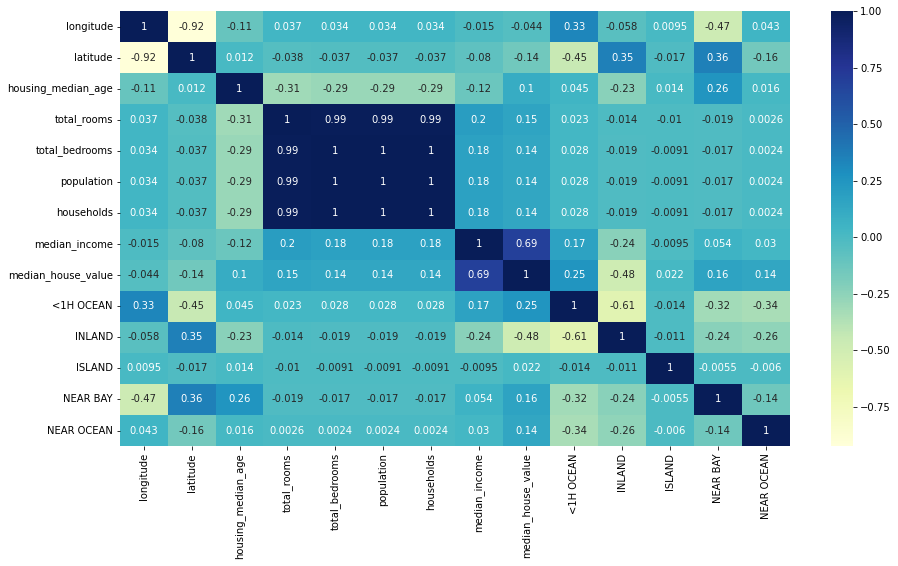

In [30]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

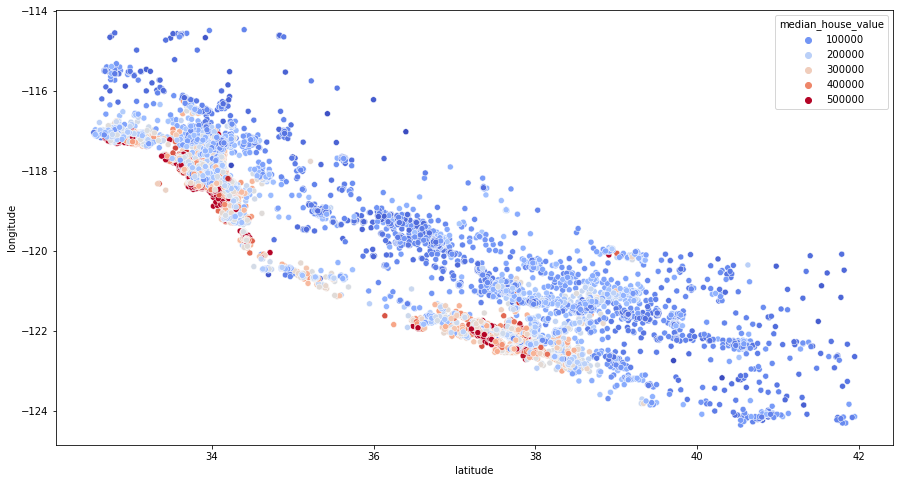

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y = "longitude", data= train_data, hue="median_house_value", palette="coolwarm")

In [32]:
train_data['bedroom_ratio']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_room']= train_data['total_rooms']/train_data['households']

In [33]:
xtrain

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4448,-118.21,34.07,47.0,1346.0,383.0,1452.0,371.0,1.7292,<1H OCEAN
16448,-121.27,38.14,33.0,3557.0,894.0,2659.0,894.0,2.2883,INLAND
8141,-118.11,33.82,36.0,1742.0,340.0,857.0,341.0,4.6875,<1H OCEAN
2074,-119.82,36.75,41.0,1022.0,209.0,741.0,213.0,2.0781,INLAND
17671,-121.87,37.31,6.0,3797.0,984.0,2437.0,904.0,3.6802,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
17730,-121.76,37.33,5.0,4153.0,719.0,2435.0,697.0,5.6306,<1H OCEAN
18043,-121.95,37.21,20.0,2345.0,322.0,890.0,276.0,10.0187,<1H OCEAN
14833,-117.10,32.67,15.0,1635.0,553.0,1347.0,597.0,1.2745,NEAR OCEAN
5332,-118.47,34.04,21.0,5041.0,1491.0,2719.0,1420.0,3.5335,<1H OCEAN


<AxesSubplot:>

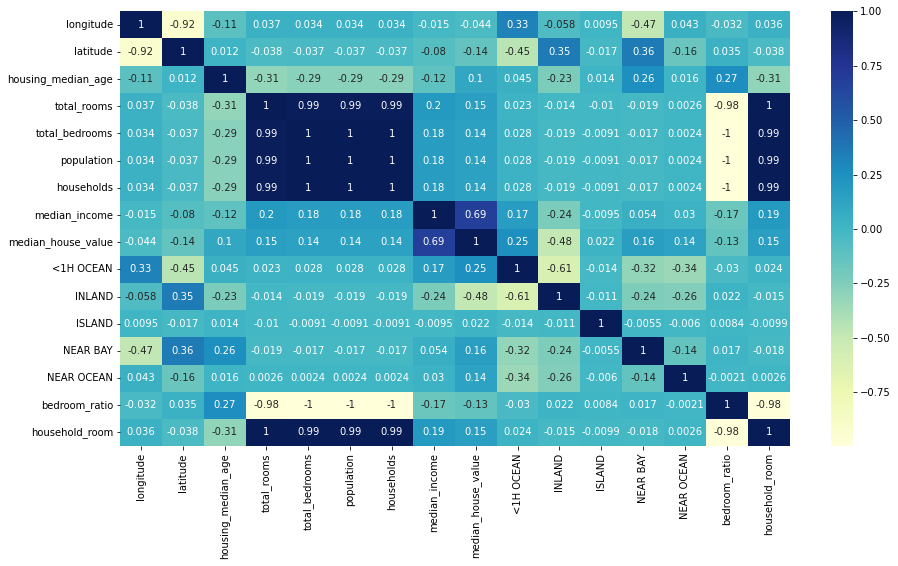

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [35]:
from sklearn.linear_model import LinearRegression

xtrain, ytrain=train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(xtrain, ytrain)

LinearRegression()

In [36]:
test_data=xtest.join(ytest)

test_data['total_rooms']=np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms']=np.log(test_data['total_rooms'] + 1)
test_data['population']=np.log(test_data['total_rooms'] + 1)
test_data['households']=np.log(test_data['total_rooms'] + 1)


test_data=test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio']= test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_room']= test_data['total_rooms']/test_data['households']

In [37]:
xtest, ytest=test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']


In [38]:
xtest


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_room
15095,-116.95,32.81,31.0,7.153052,2.098392,2.098392,2.098392,3.1106,1,0,0,0,0,0.293356,3.408825
6281,-117.92,34.03,32.0,7.506592,2.140841,2.140841,2.140841,3.9750,1,0,0,0,0,0.285195,3.506375
2737,-115.56,32.78,46.0,7.828835,2.178023,2.178023,2.178023,3.0603,0,1,0,0,0,0.278205,3.594468
17497,-119.80,34.43,22.0,7.953670,2.192063,2.192063,2.192063,5.6604,0,0,0,0,1,0.275604,3.628394
18940,-122.06,38.27,14.0,8.842316,2.286691,2.286691,2.286691,5.0672,0,1,0,0,0,0.258608,3.866861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19324,-122.97,38.53,48.0,8.278936,2.227747,2.227747,2.227747,2.1165,1,0,0,0,0,0.269086,3.716282
5246,-118.45,34.12,20.0,9.280146,2.330214,2.330214,2.330214,9.7449,1,0,0,0,0,0.251097,3.982529
973,-121.88,37.66,29.0,7.902118,2.186289,2.186289,2.186289,3.1127,0,1,0,0,0,0.276671,3.614397
9319,-122.53,37.97,52.0,5.327876,1.844965,1.844965,1.844965,1.9063,0,0,0,1,0,0.346285,2.887793


In [39]:
ytest

15095    147700.0
6281     162400.0
2737      70800.0
17497    276400.0
18940    171300.0
           ...   
19324     98700.0
5246     500001.0
973      233000.0
9319     200000.0
10048    164900.0
Name: median_house_value, Length: 4087, dtype: float64

In [40]:
reg.score(xtest , ytest)

0.6171605752332971

In [41]:
xtrain

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_room
4448,-118.21,34.07,47.0,7.205635,2.104821,2.104821,2.104821,1.7292,1,0,0,0,0,0.292108,3.423395
16448,-121.27,38.14,33.0,8.176954,2.216695,2.216695,2.216695,2.2883,0,1,0,0,0,0.271091,3.688804
8141,-118.11,33.82,36.0,7.463363,2.135747,2.135747,2.135747,4.6875,1,0,0,0,0,0.286164,3.494498
2074,-119.82,36.75,41.0,6.930495,2.070715,2.070715,2.070715,2.0781,0,1,0,0,0,0.298783,3.346908
17671,-121.87,37.31,6.0,8.242230,2.223783,2.223783,2.223783,3.6802,1,0,0,0,0,0.269804,3.706400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17730,-121.76,37.33,5.0,8.331827,2.233431,2.233431,2.233431,5.6306,1,0,0,0,0,0.268060,3.730506
18043,-121.95,37.21,20.0,7.760467,2.170249,2.170249,2.170249,10.0187,1,0,0,0,0,0.279654,3.575841
14833,-117.10,32.67,15.0,7.400010,2.128233,2.128233,2.128233,1.2745,0,0,0,0,1,0.287599,3.477068
5332,-118.47,34.04,21.0,8.525558,2.253979,2.253979,2.253979,3.5335,1,0,0,0,0,0.264379,3.782449


In [42]:
xtest

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_room
15095,-116.95,32.81,31.0,7.153052,2.098392,2.098392,2.098392,3.1106,1,0,0,0,0,0.293356,3.408825
6281,-117.92,34.03,32.0,7.506592,2.140841,2.140841,2.140841,3.9750,1,0,0,0,0,0.285195,3.506375
2737,-115.56,32.78,46.0,7.828835,2.178023,2.178023,2.178023,3.0603,0,1,0,0,0,0.278205,3.594468
17497,-119.80,34.43,22.0,7.953670,2.192063,2.192063,2.192063,5.6604,0,0,0,0,1,0.275604,3.628394
18940,-122.06,38.27,14.0,8.842316,2.286691,2.286691,2.286691,5.0672,0,1,0,0,0,0.258608,3.866861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19324,-122.97,38.53,48.0,8.278936,2.227747,2.227747,2.227747,2.1165,1,0,0,0,0,0.269086,3.716282
5246,-118.45,34.12,20.0,9.280146,2.330214,2.330214,2.330214,9.7449,1,0,0,0,0,0.251097,3.982529
973,-121.88,37.66,29.0,7.902118,2.186289,2.186289,2.186289,3.1127,0,1,0,0,0,0.276671,3.614397
9319,-122.53,37.97,52.0,5.327876,1.844965,1.844965,1.844965,1.9063,0,0,0,1,0,0.346285,2.887793
